# YOLOv8

[https://github.com/ultralytics/ultralytics](https://github.com/ultralytics/ultralytics)

In [14]:
! pip install ultralytics

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, random, tempfile, requests
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None

def imread_web(url):
    res = requests.get(url)
    img = None
    with tempfile.NamedTemporaryFile(dir=str(Path('./'))) as fp:
        fp.write(res.content)
        fp.file.seek(0)
        img = cv2.imread(fp.name)
    return img

## 検出モデルを選ぶ

In [2]:
model_size = ["n", "s", "m", "l", "x"][0]

### 通常の物体検出モデル
model = YOLO(f"./models/yolov8{model_size}.pt")

# インスタンスセグメンテーションのモデル
# model = YOLO(f"./models/yolov8{model_size}-seg.pt")

### Keypoint検出（骨格検出）のモデル
# model = YOLO(f"./models/yolov8{model_size}-pose")


# 自作モデル
# model = YOLO(f"./__output_yolov8__/20230615-1346_yolov8n_nakane_grape1/weights/best.pt")



## ローカルのサンプルデータで実行


0: 448x640 9 persons, 2 traffic lights, 7 handbags, 296.9ms
Speed: 4.4ms preprocess, 296.9ms inference, 20.9ms postprocess per image at shape (1, 3, 448, 640)


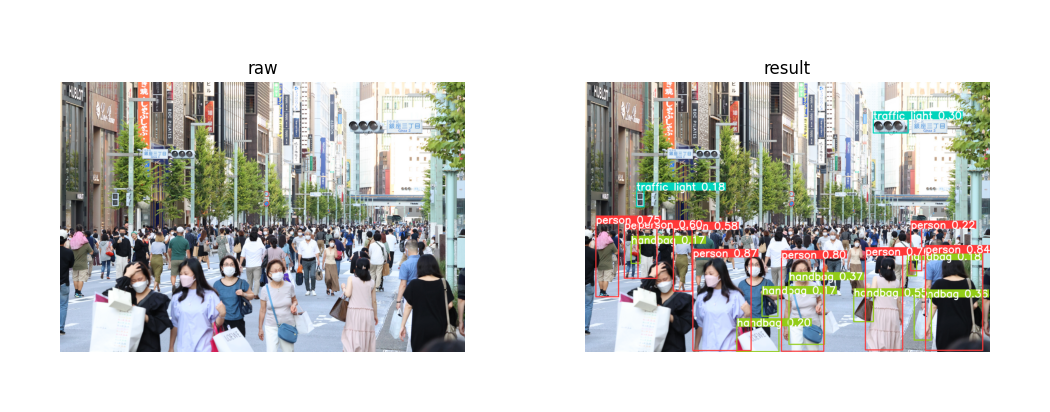

In [3]:
imgs = {}

# img_dir = Path("./yolo_datasets/nakane_grape1/train/images/")
img_dir = Path("./sample_data/")

sample_imgPath = random.choice(list(img_dir.glob("*.jpg")))

img = cv2.imread(str(sample_imgPath))
imgs["raw"] = cv2.imread(str(sample_imgPath))

# print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.1,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )


imgs["result"] = result[0].plot()

show_imgs(imgs, dpi=600, font_scale=0.2)


## ネット上の写真で実行

WARNING  'source' is missing. Using 'source=https://ultralytics.com/images/bus.jpg'.

Found https:\ultralytics.com\images\bus.jpg locally at bus.jpg


None
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'm

image 1/1 c:\Users\hirahara\Documents\Python Scripts\sentan2023\20230615_yolov8\bus.jpg: 640x480 2 persons, 1 bus, 1 stop sign, 249.1ms
Speed: 2.4ms preprocess, 249.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


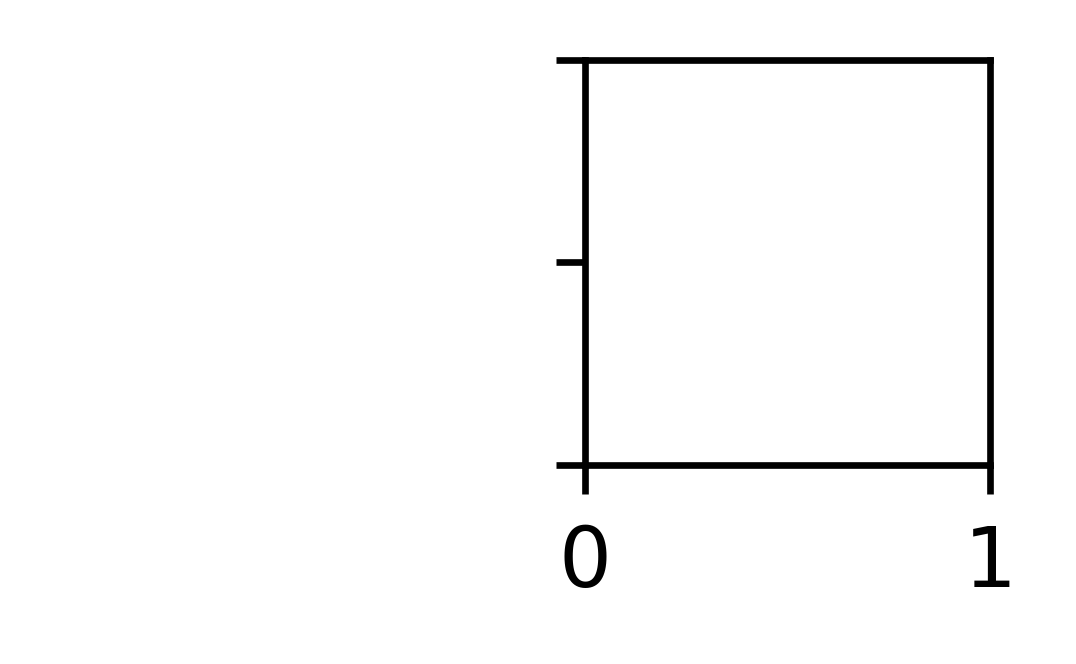

In [20]:
imgs = {}

# sample_img_url = "https://gahag.net/img/201607/05s/gahag-0103196580-1.jpg"
sample_img_url = "https://picsum.photos/200/300"
imgs["raw"] = imread_web(sample_img_url)
print(imgs["raw"])

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.1,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )


imgs["result"] = result[0].plot()

show_imgs(imgs, dpi=600, font_scale=0.2)